In [17]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
import nltk
nltk.download("stopwords")
# nltk.data.path.append('corpora/stopwords/')

[nltk_data] Downloading package stopwords to C:\Users\KEERTHI
[nltk_data]     RAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# Step 1: Data Loading and Preprocessing
data = pd.read_csv('train_essays.csv')  # Replace 'your_data.csv' with your actual dataset file

In [19]:
data.head()

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0


In [20]:
data.shape

(12679, 2)

In [21]:
print("Generated By LLM :",data[data['generated']==1].shape[0])
print("Written by a Student :",data[data['generated']==0].shape[0])

Generated By LLM : 6278
Written by a Student : 6401


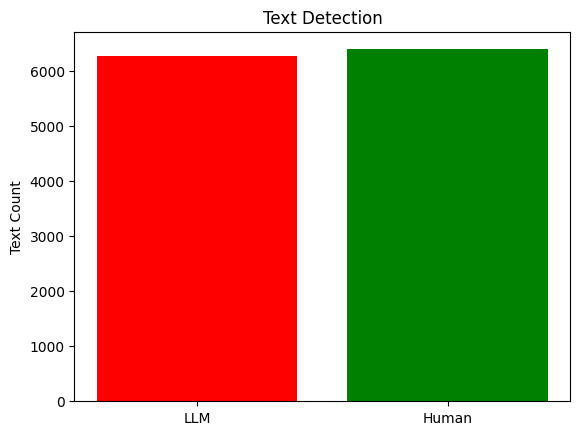

In [22]:
import matplotlib.pyplot as plt
generated_count = data[data['generated'] == 1].shape[0]
student_count = data[data['generated'] == 0].shape[0]
categories = ['LLM', 'Human']
counts = [generated_count, student_count]

# Plotting the bar chart
plt.bar(categories, counts, color=['red', 'green'])
plt.title('Text Detection')
plt.ylabel('Text Count')
plt.show()


In [23]:
class NaiveBayesClassifier:
    def __init__(self):
        self.class_probabilities = {}
        self.word_probabilities = {}
        self.classes = []

    def train(self, texts, labels):
        # Calculate class probabilities
        total_texts = len(texts)
        for label in set(labels):
            class_texts = [text for text, l in zip(texts, labels) if l == label]
            self.class_probabilities[label] = len(class_texts) / total_texts
            self.classes.append(label)

            # Calculate word probabilities for each class
            words = ' '.join(class_texts).split()
            total_words = len(words)
            unique_words = set(words)
            for word in unique_words:
                word_count = words.count(word)
                self.word_probabilities[(word, label)] = word_count / total_words

    def predict(self, text):
        # Calculate the probability for each class
        scores = {label: np.log(self.class_probabilities[label]) for label in self.classes}

        # Calculate the contribution of each word in the text
        for word in text.split():
            for label in self.classes:
                if (word, label) in self.word_probabilities:
                    scores[label] += np.log(self.word_probabilities[(word, label)])

        # Return the class with the highest probability
        return max(scores, key=scores.get)

human = data[data["generated"] == 0]["text"].tolist()
ai = data[data["generated"] == 1]["text"].tolist()

labels = [0] * len(human) + [1] * len(ai)

all_texts = human + ai
# Train the Naive Bayes classifier
classifier = NaiveBayesClassifier()
classifier.train(all_texts, labels)

# Test the classifier
new_text = "Hope you are fine"
prediction = classifier.predict(new_text)

if prediction == 0:
    print("The new text is human-written.")
else:
    print("The new text is AI-generated.")


KeyboardInterrupt: 

In [ ]:
# Split the dataset into train and development sets
train_data, dev_data = train_test_split(data, test_size=0.3, random_state=30)


In [ ]:

# Step 2: Build Vocabulary
all_tokens = [token for tokens in train_data['tokens'] for token in tokens]
token_counts = pd.Series(all_tokens).value_counts()

# Create a vocabulary list (omit rare words with occurrences less than 5)
vocabulary = list(token_counts[token_counts >= 5].index)

# Create a reverse index for the vocabulary
reverse_index = {word: idx for idx, word in enumerate(vocabulary)}

In [ ]:
print(vocabulary)
print(reverse_index)

In [ ]:
# Step 5: Calculate and Print Accuracy on the Development Set
dev_accuracy = nb_classifier.evaluate_accuracy(dev_data)
print(f"Accuracy on Development Set: {dev_accuracy}")

In [ ]:
new_document = """
 is a priceless gem that embellishes the tapestry of our lives. It is a journey of shared laughter, silent understanding, and unwavering support. The true beauty of friendship lies not in its perfection but in its imperfections, as it is through these that the bonds are strengthened. As C.S. Lewis aptly said, "Friendship is born at that moment when one person says to another, 'What! You too? I thought I was the only one.'"
"""

# Use the trained model to predict the label
predicted_label = nb_classifier.predict(new_document)
print("Predicted Label:", predicted_label)

In [ ]:
def get_top_words(class_word_counts, reverse_index, class_label, top_n=10):
    word_indices = np.argsort(class_word_counts[class_label])[::-1][:top_n]
    top_words = [word for word, idx in reverse_index.items() if idx in word_indices]
    return top_words

# Get top words for each class
top_words_class_0 = get_top_words(nb_classifier.class_word_counts, reverse_index, '0')
top_words_class_1 = get_top_words(nb_classifier.class_word_counts, reverse_index, '1')

print("Top Words for Class 0:", top_words_class_0)
print("Top Words for Class 1:", top_words_class_1)

In [ ]:
# Load the test dataset (replace 'test_data.csv' with your actual test dataset file)
test_data = pd.read_csv('test_essays.csv')

# Predict labels for the test dataset using the optimal alpha value
optimal_alpha = 1.0  # Replace with the alpha value that performed the best in your experiments

# Initialize and train the classifier with the optimal alpha
nb_classifier_optimal = NaiveBayesClassifier(vocabulary, reverse_index)
nb_classifier_optimal.train(train_data, alpha=optimal_alpha)

# Make predictions on the test dataset
test_predictions = test_data['text'].apply(lambda x: nb_classifier_optimal.predict_with_smoothing(x, alpha=optimal_alpha))

In [ ]:
# Create a Kaggle submission file
submission_df = pd.DataFrame({'id': test_data['id'], 'generated': test_predictions})
submission_df.to_csv('submission.csv', index=False)